# I] Import and options


In [57]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [58]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [59]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [60]:
path = output_file_directory + "ATG7/MEF_HuH7/Seahorse_results/"

# II] DL data

## B) Oxygen Consumption Rate 

In [64]:
%%time
file_names = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ocr_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'seahorse_OCR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               EV_norm= df_ori['Empty Vector +dox']/ df_ori['Empty Vector +dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,5:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            df['Empty Vector -dox'] = df_ori['Empty Vector -dox']
            df['Empty Vector +dox'] = df_ori['Empty Vector +dox']
            ocr_exps.append(df)

#basal level in experiment 12 is not good. Not stable, go down. I remove it
recap_ocr_dmso_basal = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[2], ocr_exps[3]], axis=0)
recap_ocr_baf_basal = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[6], ocr_exps[7]], axis=0)
recap_ocr_dmso_max = pandas.concat([ocr_exps[8], ocr_exps[9], ocr_exps[10], ocr_exps[11]], axis=0)
recap_ocr_baf_max = pandas.concat([ocr_exps[12], ocr_exps[13], ocr_exps[14], ocr_exps[15]], axis=0)

print(recap_ocr_dmso_basal, '\n', recap_ocr_baf_basal)

   MEF dox control  EV_norm   ATG7(1)   ATG7(2)    exp condition  \
0         0.666695      1.0  1.458469  1.494814   exp2      dmso   
1         0.678680      1.0  1.486579  1.504491   exp2      dmso   
2         0.679001      1.0  1.494178  1.513714   exp2      dmso   
3         0.678113      1.0  1.494656  1.509662   exp2      dmso   
4         0.679087      1.0  1.494944  1.502106   exp2      dmso   
5         0.676222      1.0  1.490811  1.499106   exp2      dmso   
0         1.329883      1.0  1.108199  0.502076   exp7      dmso   
1         1.262581      1.0  1.149208  0.553143   exp7      dmso   
2         1.245307      1.0  1.133166  0.573492   exp7      dmso   
3         1.206674      1.0  1.145803  0.579330   exp7      dmso   
4         1.168701      1.0  1.144112  0.586895   exp7      dmso   
5         1.149549      1.0  1.199558  0.617820   exp7      dmso   
0         1.343889      1.0  1.016770  0.904928  exp12      dmso   
1         1.124847      1.0  1.182318  1.101129 

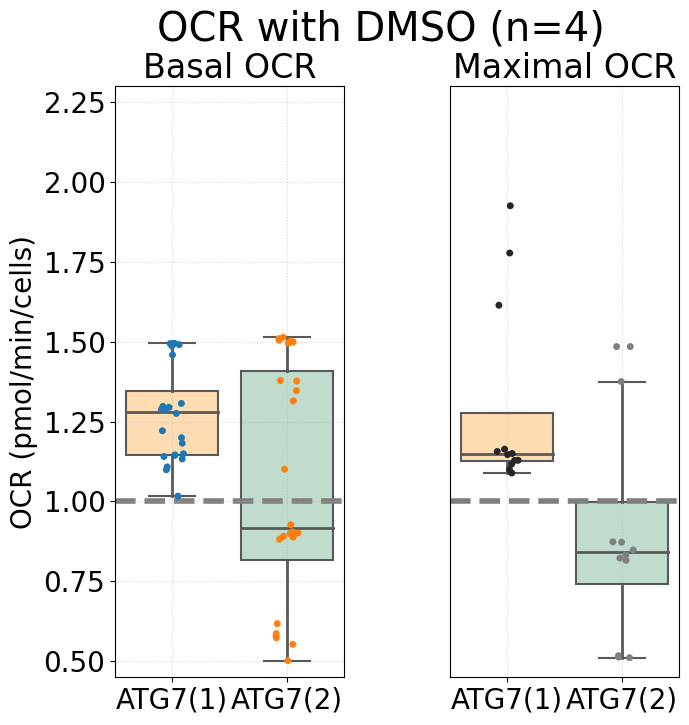

<Figure size 1200x800 with 0 Axes>

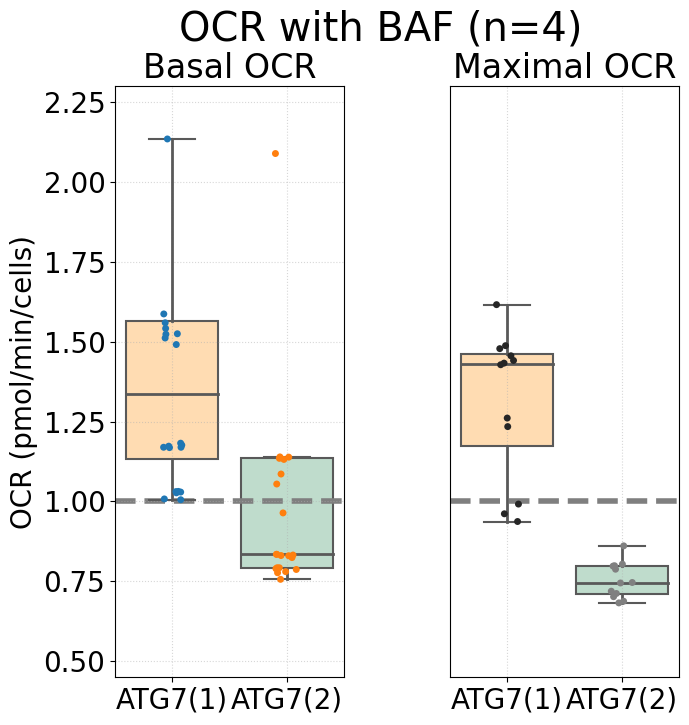

<Figure size 1200x800 with 0 Axes>

In [86]:
# BASAL LEVEL RATE
dfs_basal = recap_ocr_dmso_basal, recap_ocr_baf_basal
dfs_max = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs_basal)):
    df_basal = dfs_basal[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'OCR with {info} (n=4)', y=1.05, fontsize="x-large")

    #graph for basal
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_basal.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_basal.iloc[:,2:4])
    
    fig.set_title('Basal OCR')
    fig.set_xlabel('')
    fig.set_ylabel('OCR (pmol/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.30)

    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], palette='dark:grey')
   
    fig.set_title('Maximal OCR')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.30)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_OCR_final_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

## Stats

In [56]:
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal, recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO_basal', 'BAF_basal', 'DMSO_max_capacity', 'BAF_max_capacity'


for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df['Empty Vector +dox'], df['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')
    
    #isoform1 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(1) vs dox is {Pvalue}')    
    
    #isoform2 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(2)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(2) vs dox is {Pvalue}')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

DMSO_BASAL
pvalue no dox vs dox is 6.280E-01
pvalue ATG7(1) vs dox is 2.345E-10
pvalue ATG7(2) vs dox is 6.045E-01
pvalue: ATG7(1) vs ATG7(2) is 1.460E-01

BAF_BASAL
pvalue no dox vs dox is 3.274E-01
pvalue ATG7(1) vs dox is 2.345E-10
pvalue ATG7(2) vs dox is 2.951E-01
pvalue: ATG7(1) vs ATG7(2) is 3.753E-04

DMSO_MAX_CAPACITY
pvalue no dox vs dox is 1.000E+00
pvalue ATG7(1) vs dox is 1.027E-05
pvalue ATG7(2) vs dox is 2.850E-02
pvalue: ATG7(1) vs ATG7(2) is 1.019E-02

BAF_MAX_CAPACITY
pvalue no dox vs dox is 7.508E-01
pvalue ATG7(1) vs dox is 2.850E-02
pvalue ATG7(2) vs dox is 1.027E-05
pvalue: ATG7(1) vs ATG7(2) is 3.658E-05



### 1) Basal level rate

the pvalue between no dox and dox with DMSO is 7.000E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 1.460E-01


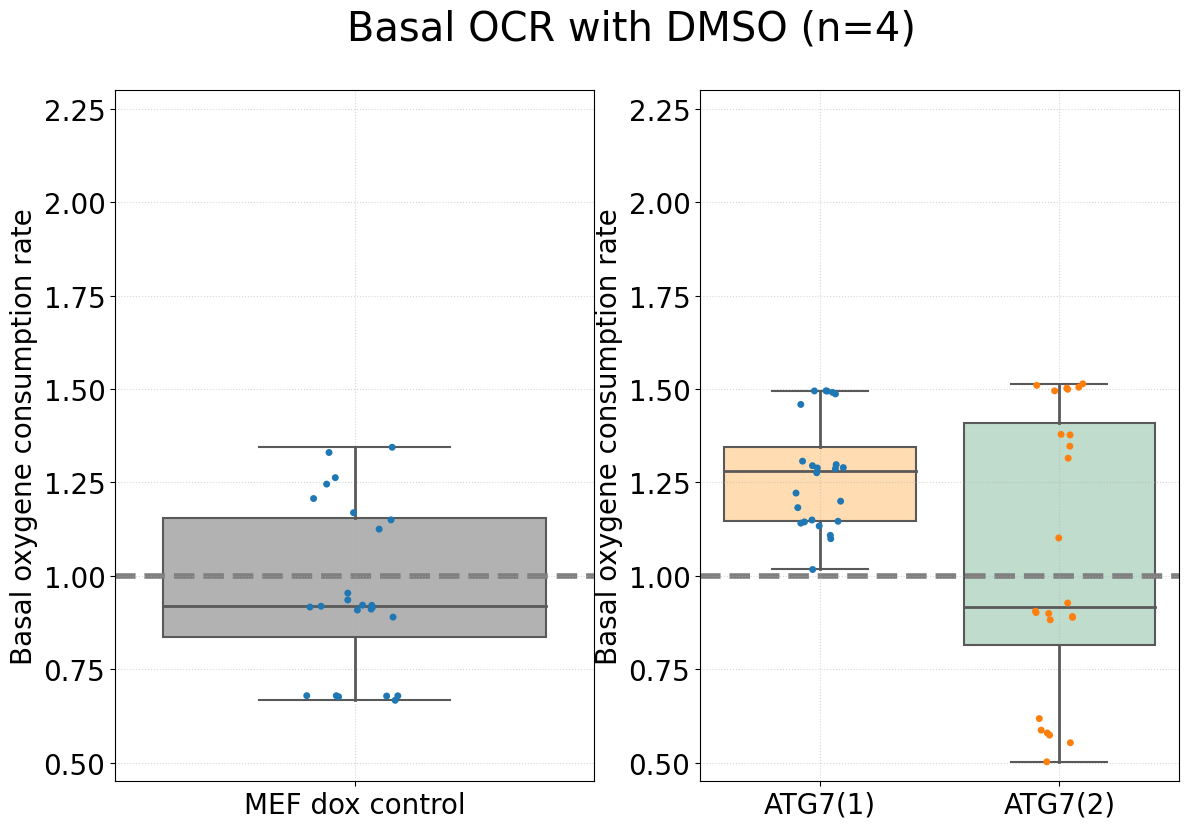

the pvalue between no dox and dox with BAF is 7.000E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 3.753E-04


<Figure size 1200x800 with 0 Axes>

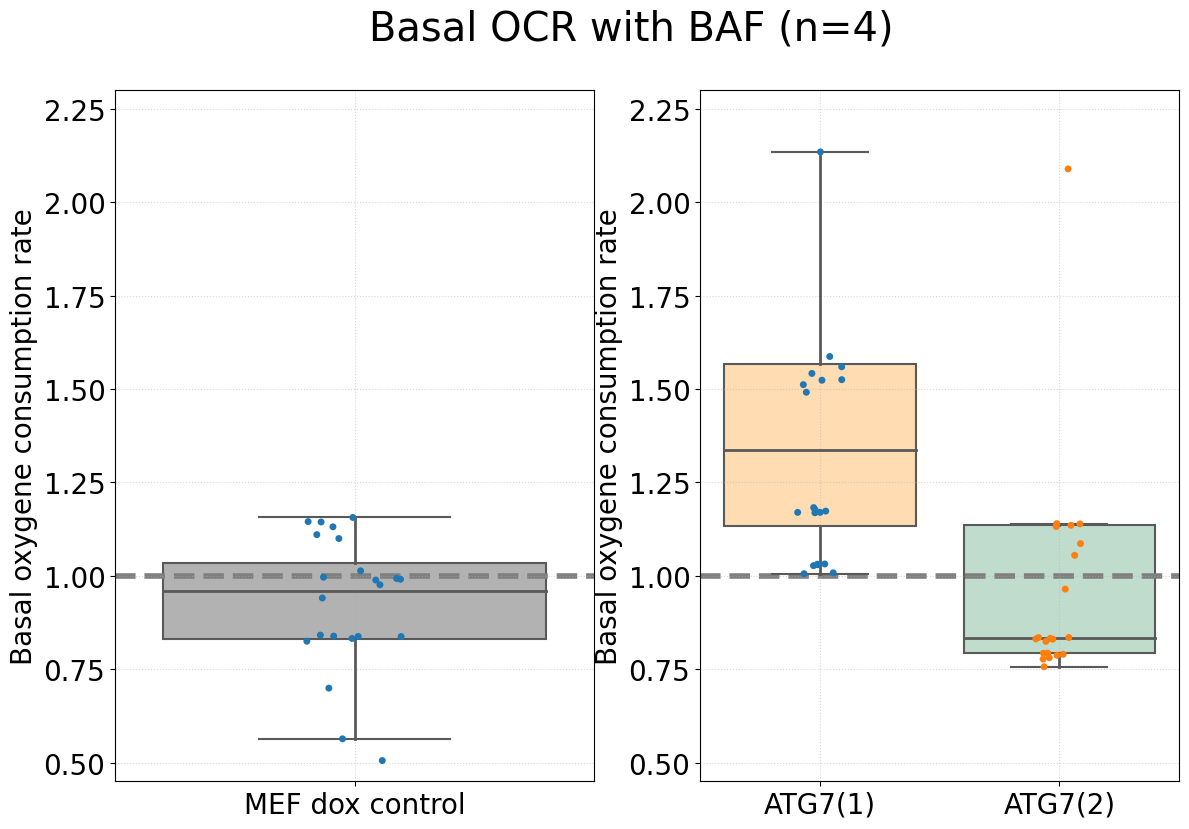

<Figure size 1200x800 with 0 Axes>

In [19]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal OCR with {info} (n=4)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1])
    
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.3)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:])
   
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.3)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

the pvalue between no dox and dox with DMSO is 7.000E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 1.019E-02


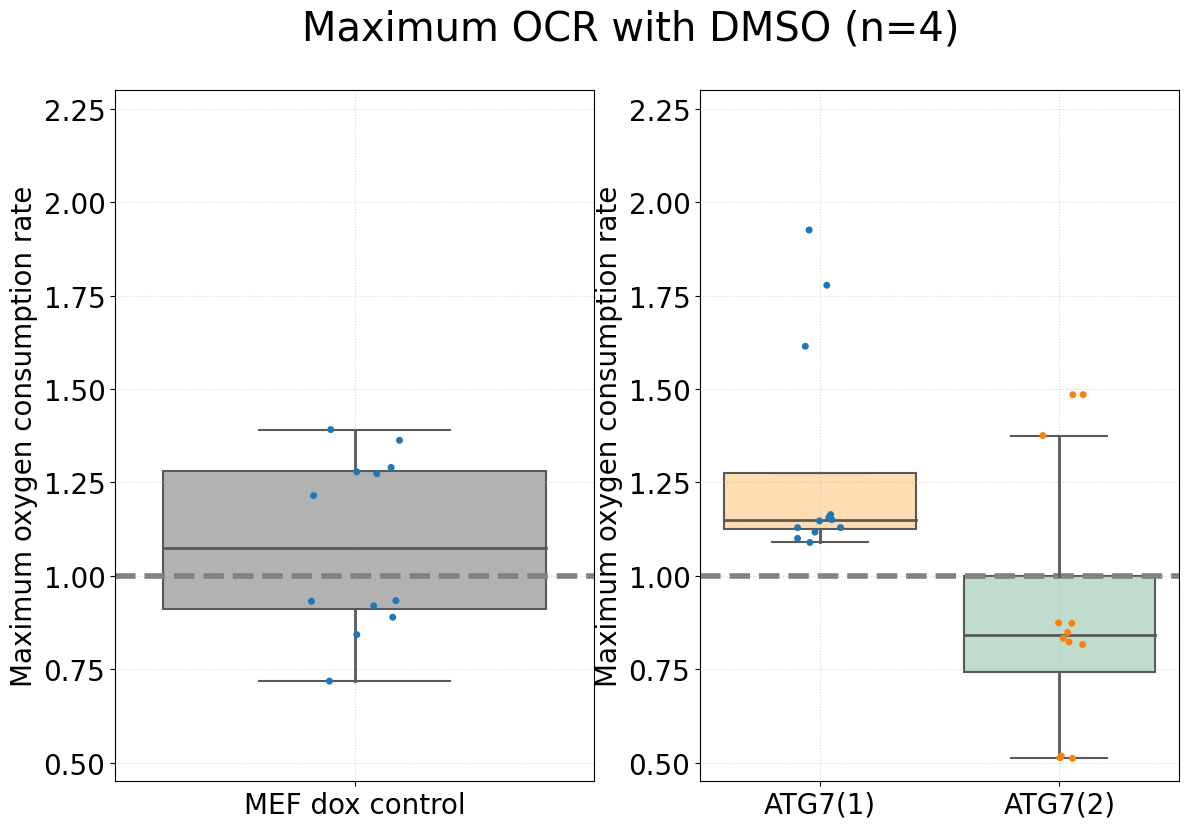

the pvalue between no dox and dox with BAF is 7.000E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 3.658E-05


<Figure size 1200x800 with 0 Axes>

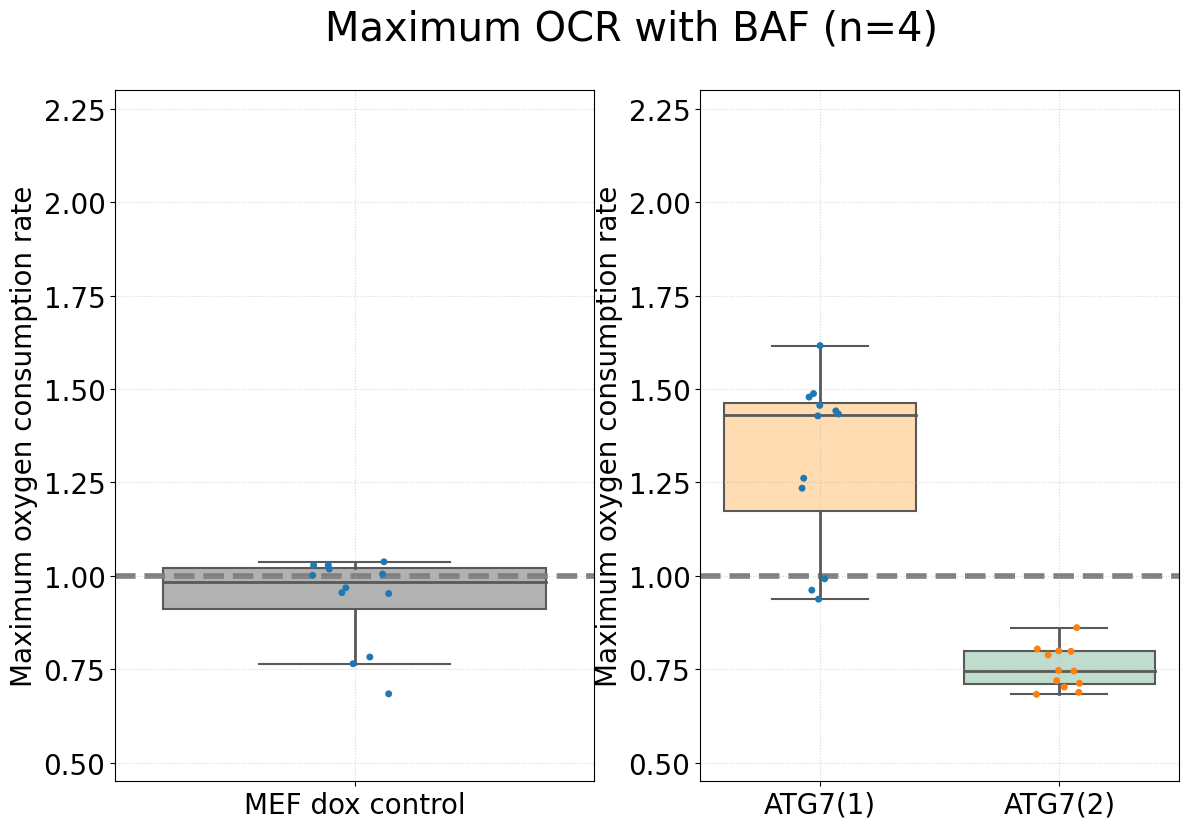

<Figure size 1200x800 with 0 Axes>

In [20]:
# Maximum LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=4)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1])
    
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.3)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:])
   
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.3)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()